# TP Apprentissge

### Import des librairies :

In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import graphviz
plt.ion()

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import linear_model
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score

import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

### Données

In [26]:
# Import

df_cancer = pd.read_csv('data/df_breastCancer.csv', delimiter = ';')
df_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
# Séparation valeurs et diagnostic
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer.diagnosis

# Codage des catégories. B = 0, M = 1
y = y.replace('B', 0)
y = y.replace('M', 1)

df_cancer.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Visualisation des variables

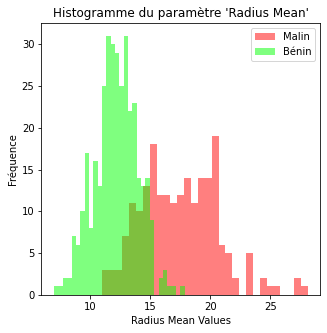

In [84]:
# Historgramme

plt.figure(figsize=(5, 5))
m = plt.hist(X[y == 1].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malin")
b = plt.hist(X[y == 0].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bénin")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Fréquence")
plt.title("Histogramme du paramètre 'Radius Mean'")
plt.show()

### Sélection des features

#### Multi-corrélations
La figure suivante montre que beaucoup de features ont des facteurs de corrélation positifs et proches de 1 : on doit 

#### Facteur d'Inflation de Variance (VIF)
On utilise le Facteur d'Inflation de Variance pour déterminer les features qui font l'objet d'une trop grande multi-colinéarité. Si le VIF d'un paramètre dépasse 10, alors celui-ci va réduire la fiabilité de notre modèle.

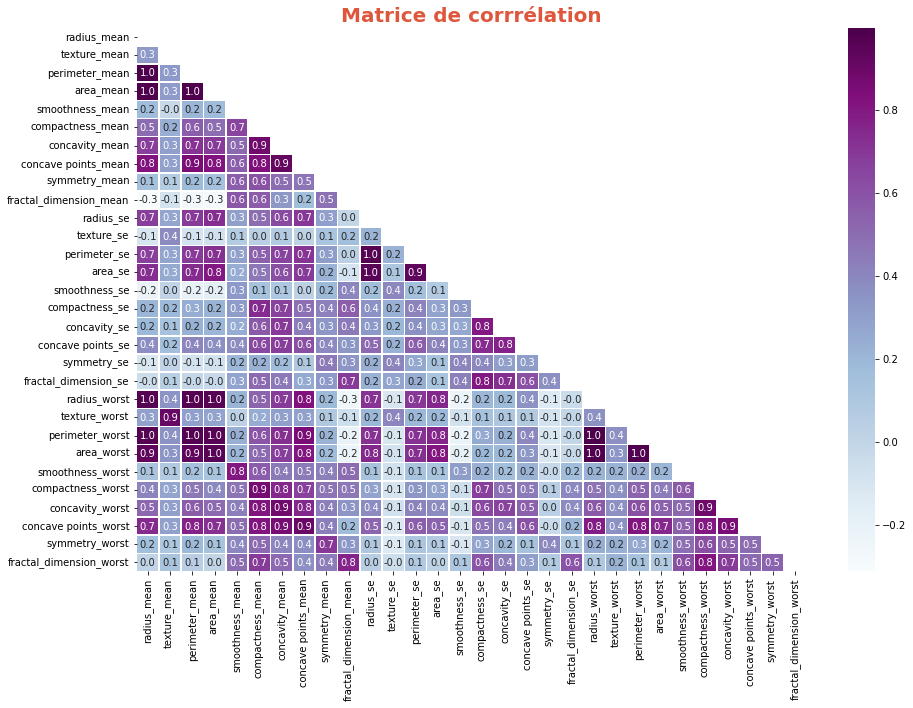

In [120]:
correlations = df_cancer.corr()
masque = np.triu(np.ones_like(correlations, dtype = bool))

plt.figure(figsize=(15, 10))
sns.heatmap(correlations,
            mask = masque,
            cmap = 'BuPu',
            annot = True,
            linewidths = 0.5,
            fmt = ".1f")

plt.title('Matrice de corrrélation',
          fontsize = 20,
          weight = 'semibold',
          color = '#de573c'
         )

plt.show()

In [122]:
def VIF(df):
    vif = pd.DataFrame()
    vif['feature'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, col) for col in range(len(df.columns))]
    return vif

vif_df = VIF(X).sort_values('VIF', ascending = False, ignore_index = True)
print(vif_df)

                    feature           VIF
0               radius_mean  63306.172036
1            perimeter_mean  58123.586079
2              radius_worst   9674.742602
3           perimeter_worst   4487.781270
4                 area_mean   1287.262339
5                area_worst   1138.759252
6    fractal_dimension_mean    629.679874
7   fractal_dimension_worst    423.396723
8           smoothness_mean    393.398166
9          smoothness_worst    375.597155
10            texture_worst    343.004387
11             texture_mean    251.047108
12                radius_se    236.665738
13           symmetry_worst    218.919805
14             perimeter_se    211.396334
15         compactness_mean    200.980354
16            symmetry_mean    184.426558
17           concavity_mean    157.855046
18      concave points_mean    154.241268
19     concave points_worst    148.673180
20        compactness_worst    132.884276
21          concavity_worst     86.310362
22                  area_se     72

Les valeurs sont toutes grandement supérieures à 5 (borne acceptable). On peut choisir de conserver les features dont le VIF ne dépasse pas 10000.

In [128]:
borne = 10000
feature_drop = vif_df[vif_df['VIF'] > borne].feature
X_selected = X.drop(feature_drop, axis=1)

### Entrainement

#### Découpage entre données d'apprentissage (66%) et de test (33%)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.33)
print(len(X_train),'données d\'apprentissage')
print(len(X_test),'données de test')

381 données d'apprentissage
188 données de test


#### Modèle linéaire

In [134]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train1, y_train1)

ldaScore_train = "%.3f" % lda.score(X_train, y_train)
ldaScore_test = "%.3f" % lda.score(X_test, y_test)

print("Train:",ldaScore_train)
print("Test:",ldaScore_test)

NameError: name 'X_train1' is not defined